# 1) 데이터 읽기

In [170]:
import pandas as pd

df = pd.read_csv('./DSA_features.csv')

df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


# 2) EDA 실행

In [171]:
df.shape

(9120, 272)

## 2-1) 결측치 확인, 제거

In [172]:
# 결측치 확인
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [173]:
df.isnull().values.any()

False

## 2-2) 레이블 확인

Text(0, 0.5, 'Count')

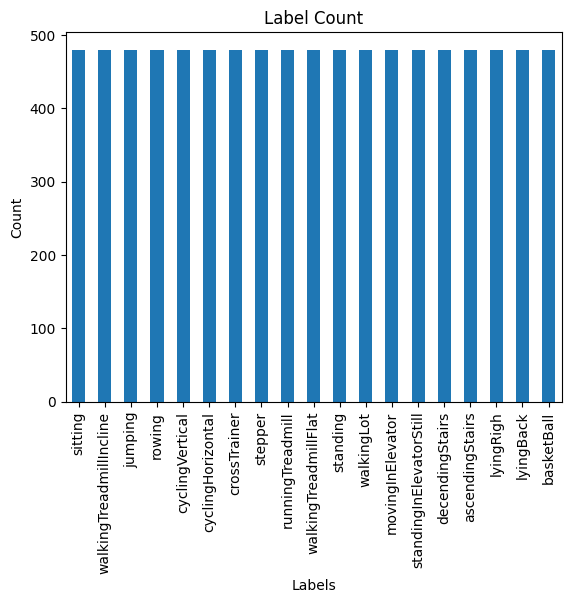

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [175]:
# 레이블 갯수 확인 (숫자)
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [176]:
# DSA데이터에서 sitting(normal) jumping(abnormal)만 남김

filtered_df = df[df['activity'].isin(['sitting', 'jumping'])]

filtered_df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [177]:
LABELS = ["Normal", "Abnormal"]

C:\Users\황주신\AppData\Local\Temp\ipykernel_8972\2237617807.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(filtered_df['activity'], sort = True)


Text(0, 0.5, 'Frequency')

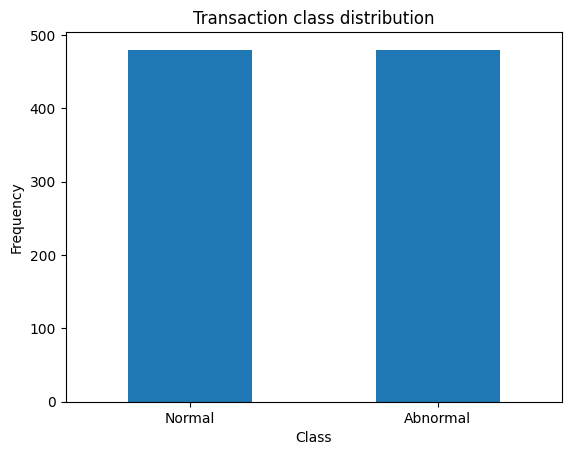

In [178]:
count_classes = pd.value_counts(filtered_df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [179]:
# filtered_df를 기준으로 abnormal과 normal 데이터프레임 생성
abnormal = filtered_df[filtered_df['activity'] == 'jumping']
normal = filtered_df[filtered_df['activity'] == 'sitting']

# abnormal 데이터프레임의 shape 확인
print(abnormal.shape)


(480, 272)


In [180]:
normal.shape

(480, 272)

## 2-3) 데이터 및 레이블 인코딩

activity를 레이블 인코딩해줌

In [181]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
filtered_df['activity'] = label_encoder.fit_transform(filtered_df['activity'])

filtered_df['activity'].value_counts()

C:\Users\황주신\AppData\Local\Temp\ipykernel_8972\244765889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['activity'] = label_encoder.fit_transform(filtered_df['activity'])


activity
1    480
0    480
Name: count, dtype: int64

### 1이 sitting, 0이 jumping인 이유 : 알파벳 순서로 정렬하기 때문에

people를 삭제

In [182]:
# 'people' 컬럼을 삭제
filtered_df = filtered_df.drop('people', axis = 1)

filtered_df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,0
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,0
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,0
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,0


# 3) Train데이터, Test데이터 나누기

In [183]:
RANDOM_SEED = 32

# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(filtered_df, test_size = 0.2, random_state = RANDOM_SEED)

# 4) Train, Valid 데이터 나누기

In [184]:
X_train, X_valid = train_test_split(X_train, test_size = 0.2, random_state= RANDOM_SEED)

In [185]:
X_train = X_train[X_train.activity == 1]
X_train = X_train.drop(['activity'], axis = 1)

X_valid = X_valid[X_valid.activity == 1]
X_valid = X_valid.drop(['activity'], axis = 1)

Y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis = 1)

In [186]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

# 5) 데이터 스케일링

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

# 5) Model 정의하기

In [188]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

input_dim = X_train_scaled.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 7) 학습, 예측

In [189]:
history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs = 50, batch_size = 32, shuffle = True, validation_data= (X_valid_scaled,X_valid_scaled))

autoencoder.summary()

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.2829 - val_loss: 1.2452
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0638 - val_loss: 1.2383
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1591 - val_loss: 1.2273
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1253 - val_loss: 1.2087
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0656 - val_loss: 1.1790
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9749 - val_loss: 1.1378
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9960 - val_loss: 1.0903
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0033 - val_loss: 1.0451
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2217 - val_loss: 1.0095
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9499 - val_loss: 0.9841
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2184 - val_loss: 0.9665
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0271 - val_l

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 14)             │         3,794 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 270)            │         2,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,347 (71.67 KB)

 Trainable params: 6,115 (23.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,232 (47.79 KB)

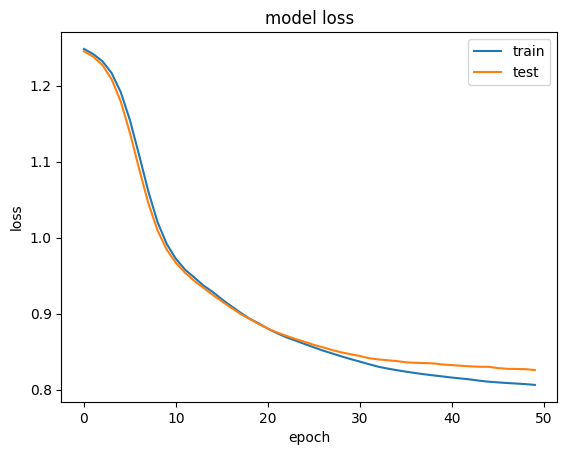

In [190]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [210]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Y_test})

error_df = error_df.reset_index(drop = True)
error_df

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
0,68.948745,0
1,5.242938,1
2,59.804555,0
3,5.000117,1
4,5.242158,1
...,...,...
187,150.266845,0
188,5.017743,1
189,442.303123,0
190,5.262690,1


In [211]:
error_df.describe()

,reconstruction_error,true_class
count,192.000000,192.000000
mean,220.297121,0.500000
std,342.443334,0.501307
min,4.855396,0.000000
25%,5.066197,0.000000
50%,25.026817,0.500000
75%,368.339366,1.000000
max,2065.527055,1.000000


In [212]:
error_df_normal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error,true_class
count,96.000000,96.0
mean,5.087217,1.0
std,0.136783,0.0
min,4.855396,1.0
25%,5.002711,1.0
50%,5.066179,1.0
75%,5.158322,1.0
max,5.511285,1.0


In [213]:
error_df_abnormal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error,true_class
count,96.000000,96.0
mean,435.507025,0.0
std,377.045865,0.0
min,44.542349,0.0
25%,120.693470,0.0
50%,369.598939,0.0
75%,610.740217,0.0
max,2065.527055,0.0


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

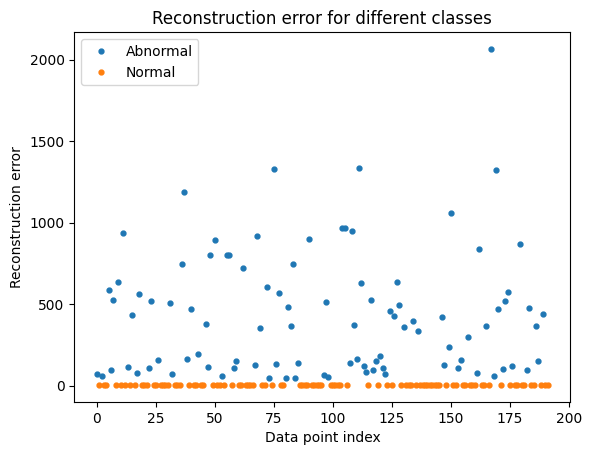

In [214]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

abnormal의 최솟값과 normal의 최댓값의 중간값(24)로 threshold 값을 구해주자.

In [215]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 24

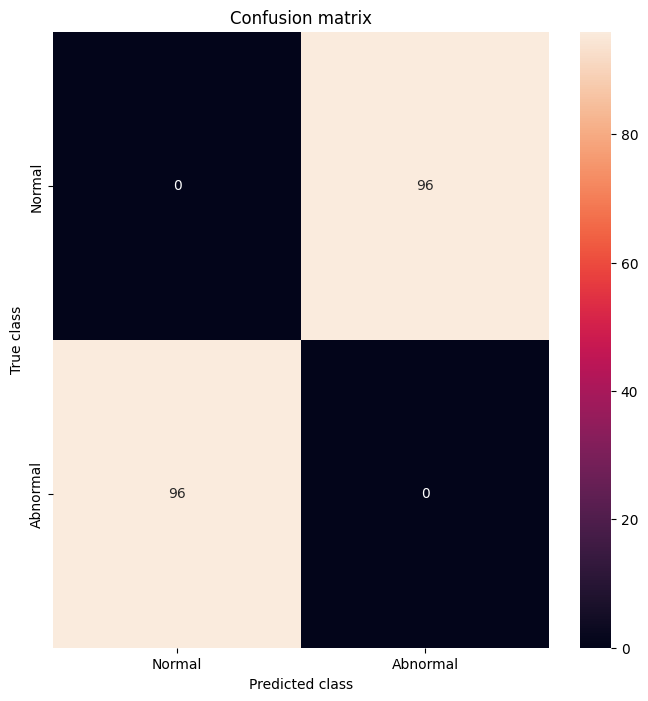

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      96.0
           1       0.00      0.00      0.00      96.0

    accuracy                           0.00     192.0
   macro avg       0.00      0.00      0.00     192.0
weighted avg       0.00      0.00      0.00     192.0



In [216]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

100퍼센트의 정확도를 만들어낼 수 있었다.